# Tasks
In this Notebook, I made some updates according to the feedback on Milestone 2 -- Charts add title, labels and descriptions.
And then I export the clean data into a csv file preparing for Tableau workbook.

# Task 3: Conduct an Exploratory Data Analysis (EDA) on your dataset 

In [1]:

import sys
import os
path_dir = os.getcwd()


In [6]:


module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
import project_functions

In [7]:
url_or_path_to_csv_file = 'http://data.insideairbnb.com/united-states/nc/asheville/2021-04-19/data/listings.csv.gz'
df = project_functions.load_and_process(url_or_path_to_csv_file)
df.head()

,host_id,host_acceptance_rate,host_response_rate,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating,reviews_per_month,superhost_flag,host_identity_verified_flag
0,320564,29%,88%,35.60670,-82.55563,Entire apartment,Entire home/apt,2,1,1.0,1.0,82.00,90.0,0.76,0,1
1,746673,100%,100%,35.57864,-82.59578,Entire guesthouse,Entire home/apt,2,1,1.0,1.0,90.00,91.0,2.53,1,1
2,746673,100%,100%,35.57864,-82.59578,Private room in house,Private room,2,2.5,1.0,1.0,66.00,90.0,0.57,1,1
3,746673,100%,100%,35.57864,-82.59578,Shared room in hostel,Shared room,1,2.5,1.0,6.0,33.00,94.0,2.40,1,1
5,1029919,43%,100%,35.61856,-82.55276,Entire guest suite,Entire home/apt,4,1,1.0,2.0,134.00,97.0,0.49,0,1


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)

### 1st EDA Visualized Plot


In [10]:
df_price = df[['property_type', 'price']]
df_price['price']  = df_price['price'].str.replace(',', '')
df_price['price'] = pd.to_numeric(df_price['price'])


df_price2 = df_price.groupby(['property_type']).mean()
df_price2.sort_values(by='price',  ascending=False).reset_index()



<ipython-input-10-8413ceb902b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['price']  = df_price['price'].str.replace(',', '')
<ipython-input-10-8413ceb902b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['price'] = pd.to_numeric(df_price['price'])


,property_type,price
0,Room in hotel,371.000000
1,Entire chalet,323.250000
2,Room in bed and breakfast,253.222222
3,Treehouse,245.000000
4,Entire house,232.746377
5,Entire townhouse,225.222222
6,Entire condominium,208.074766
7,Entire cabin,207.842105
8,Entire loft,206.827586
9,Entire cottage,187.083333


From the above table of average prices by different property types (descending order by average price), we can find out that 'Room in hotel' and 'Entire chalet' have relatively higher prices comparing to other types of property.

# 2nd EDA Visualized Plot

<ipython-input-39-8a3c03464d3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_df['price']  = pair_df['price'].str.replace(',', '')
<ipython-input-39-8a3c03464d3c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_df['price'] = pd.to_numeric(pair_df['price'])


Text(0.5, 1.08, 'Relationship Between Airbnb Houses Attributes')

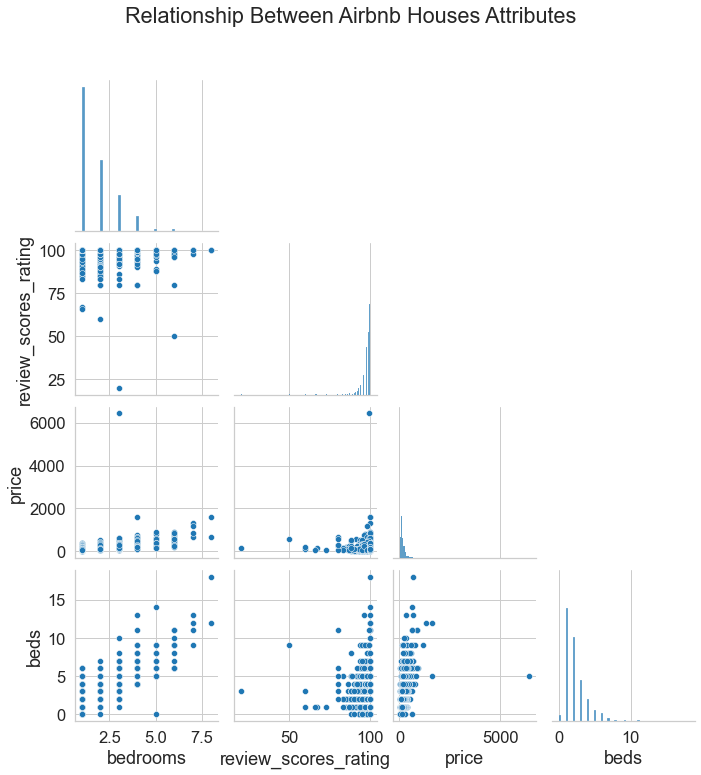

In [39]:
# Your Solution here
pair_df = df[[ 'bedrooms', 'bathrooms',  'review_scores_rating', 'price', 'beds', 'host_response_rate']]
pair_df['price']  = pair_df['price'].str.replace(',', '')
pair_df['price'] = pd.to_numeric(pair_df['price'])

ax = sns.pairplot(pair_df, corner = True)
ax.fig.suptitle("Relationship Between Airbnb Houses Attributes", y=1.08)


From the second EDA plot, we found that bedrooms is highly correlated to beds, thus it might exist multi-collinearity. Besides, beds and bedrooms have positive correlation with prices. I also find out that beds might have positive relationship with review scores ratings.

# 3rd EDA Visualized Plot

<ipython-input-40-00c7a87c8ec5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_df['host_response_rate']  = pair_df['host_response_rate'].str.split('%').str[0]
<ipython-input-40-00c7a87c8ec5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_df['host_response_rate'] = pd.to_numeric(pair_df['host_response_rate'])


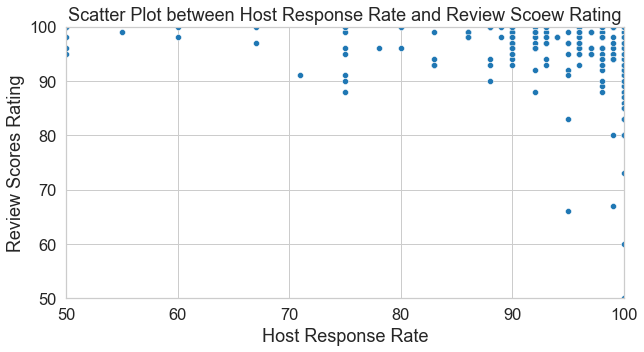

In [40]:
pair_df['host_response_rate']  = pair_df['host_response_rate'].str.split('%').str[0]
pair_df['host_response_rate'] = pd.to_numeric(pair_df['host_response_rate'])

plt.figure(figsize=(10,5))
plot = sns.scatterplot(data=pair_df, x="host_response_rate", y="review_scores_rating")
plot.set_xlim(50, 100)
plot.set_ylim(50, 100)
plt.title( "Scatter Plot between Host Response Rate and Review Scoew Rating")
plt.ylabel("Review Scores Rating")
plt.xlabel("Host Response Rate")



plt.show()

### Above Figure Analysis and Report
From the above scatter plot, it reveals the relationship between the host response rate and review scores ratings. The majority data points have a review score rating greater or equal to 90. Comparing to host response rate, the range of host response rate varies a lot and it should have larger variatiion than review scores ratings.

Text(0.5, 49.99999999999995, 'Host Response Rate')

<Figure size 720x1080 with 0 Axes>

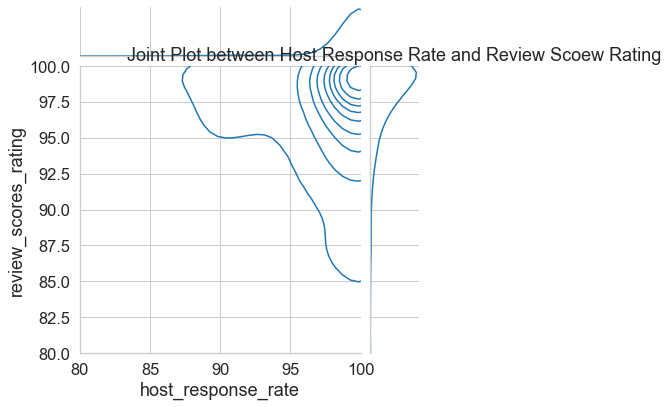

In [46]:
plt.figure(figsize=(10,15))
plot = sns.jointplot(data=pair_df, x="host_response_rate", y="review_scores_rating", kind="kde")

plot.ax_marg_x.set_xlim(80, 100)
plot.ax_marg_y.set_ylim(80, 100)
plt.title( "Joint Plot between Host Response Rate and Review Scoew Rating")
plt.ylabel("Review Scores Rating")
plt.xlabel("Host Response Rate")

### Join Plot Analysis
The above join plot shows the relationship between host response rate and review score ratings. It indicates that for higher host response rate, the review scores ratings tends to be higher

(80.0, 100.0)

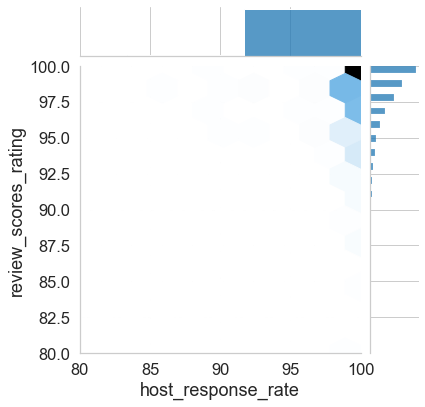

In [70]:
plot = sns.jointplot(data=pair_df, x="host_response_rate", y="review_scores_rating", kind="hex")

plot.ax_marg_x.set_xlim(80, 100)
plot.ax_marg_y.set_ylim(80, 100)

In the profile report, it says that there is high correlation between review scores ratings and host response rate, thus I plot a scatter plot to investigate from the chart, however, I did not see obvious pattern.

# 4th EDA Visualized Plot

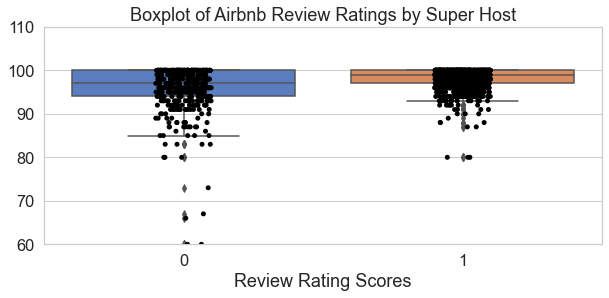

In [46]:
fig, ax = plt.subplots(figsize = (10, 4))
df_box = df[[ 'superhost_flag', 'review_scores_rating']]

sns.boxplot(y='review_scores_rating',  x='superhost_flag', data = df_box, palette='muted')
sns.stripplot(y='review_scores_rating', x='superhost_flag', data = df_box, color='black')
ax.set_title("Boxplot of Airbnb Review Ratings by Super Host")
ax.set_ylabel("")
ax.set_xlabel("Review Rating Scores")

ax.set_ylim(60, 110)

plt.show()

My hypothesis is that for super host, the houses tend to have higher review ratings comparing to non-super host. Thus I make a boxplot with strip plot by super host flag. It seems that super host indeed have higher review ratings with smaller variation.

# Task 4. Conduct your analysis to help answer your research question(s)

### RQ1. First Research Question: What are the key factors for prices?


-- From pairplot, it cna be figured out that beds and bedrooms have positive correlation with prices. There might be weak positive correlation between review scores rating and price which needs to be verified by pearson correlation values.

### RQ2. Second Research Question: What are the key factors for review scores rating?

-- It seems that there is high correlation between review scores ratings and host response rate. Besides, the super host is likely to have higher review scores ratings comparing to non-super host.

### RQ3. First Research Question: Which property type tends to have higher or lower prices?

-- From the above visualization table of average prices by different property types (descending order by average price), we can find out that 'Room in hotel' and 'Entire chalet' have relatively higher prices comparing to other types of property with prices reach to nearly 400. The property types of Hut and Shared rooms are obviously have lower prices below 50.
